In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from app import App

In [13]:
def get_summary(file_name):
    with open(os.path.join(App.config("benchmark_output"), file_name), "r") as f:
        lines = f.readlines()
    lines = [line.strip() for line in lines]

    summary_starts = lines.index("SUMMARY_BEGIN")
    summary_ends = lines.index("SUMMARY_END")

    summary_lines = lines[summary_starts+1:summary_ends]
    rand_res = int(summary_lines[0].split(" ")[1])
    sdp_res = int(summary_lines[1].split(" ")[1])
    exac_res = int(summary_lines[2].split(" ")[1])

    return rand_res, sdp_res, exac_res

In [20]:
all_logs = os.listdir(App.config("benchmark_output"))

def file_orderer(s):
    f_name_base = s.split(".")[0]
    _, n, m, k = f_name_base.split("_")
    return 100000* int(n) + 100 * int(m) + int(k)

all_logs.sort(key=file_orderer)

line_terminate = "\\\\\n"
with open("allinst.tex", "w") as f:
    for log_f in all_logs:
        if log_f.endswith(".log"):
            f_name_base = log_f.split(".")[0]
            f_name_base.replace("_", "\\_")
            _, n, m, k = f_name_base.split("_")
            rand_res, sdp_res, exac_res = get_summary(log_f)
            if exac_res == -1:
                exac_res = "\\TLE"
            f.write(f"({n}, {m}, {k}) & {rand_res} & {sdp_res} & {exac_res} {line_terminate}")
# get_summary("random_5_10_0.cnf.log")

In [32]:
os.getcwd()

'/home/sergey/hkust/CONVOPT/experiments'

In [33]:
files_to_plot_convergence = [
    (5, 20, 1),
    (10, 50, 1),
    (20, 200, 1),
    (50, 1250, 1),
    (100, 5000, 1)
]

In [39]:
def extract_convergence(file_name):
    with open(os.path.join(App.config("benchmark_output"), file_name), "r") as f:
        lines = f.readlines()
    lines = [line.strip() for line in lines]
    zero_phase = []
    one_phase = []

    for line in lines:
        if line.strip().split()[0] == "iter":
            zero_phase.append(float(line.strip().split()[3]))
        if line.strip().split()[0] == "iter_n":
            one_phase.append(float(line.strip().split()[9]))

    return one_phase

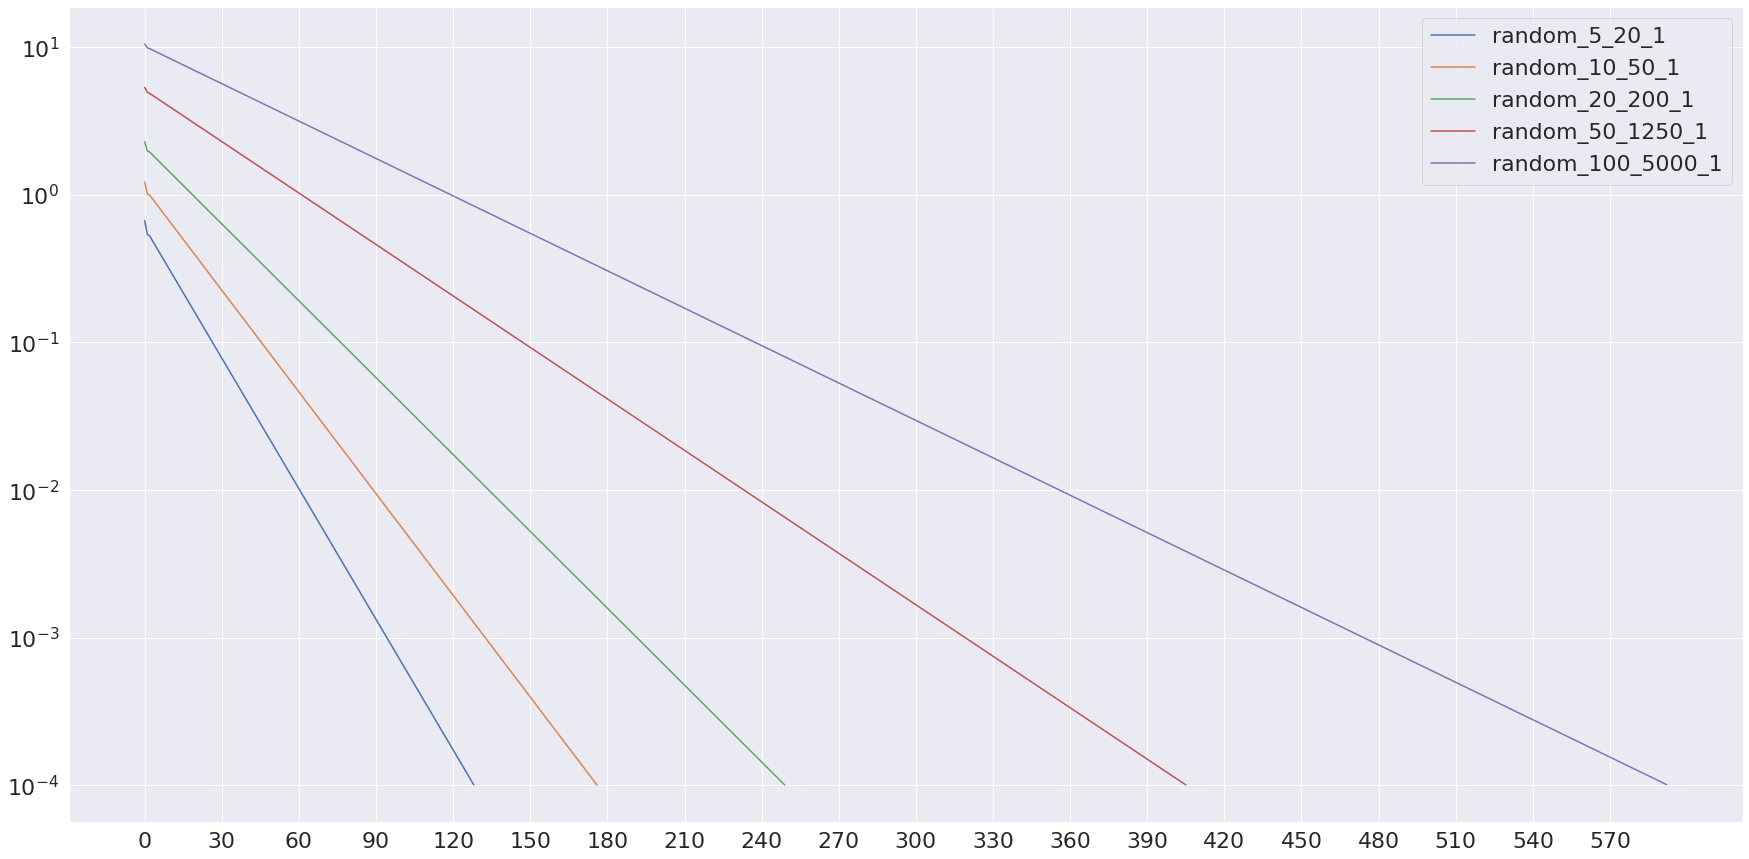

In [50]:
max_iter = 0

sns.set_context("paper")
sns.set(font_scale=2)


for n, m, k in files_to_plot_convergence:
    file_name = f"random_{n}_{m}_{k}.cnf.log"
    conv = extract_convergence(file_name)
    max_iter = max(max_iter, len(conv))
    sns.lineplot(x=range(len(conv)), y=conv, label=f"random_{n}_{m}_{k}")


plt.yscale("log")
plt.xticks(range(0, max_iter, 30))
plt.legend()
plt.plot()

convergence = extract_convergence("random_5_10_0.cnf.log")

# save figure
plt.savefig("newton_convergence.png", dpi=300)

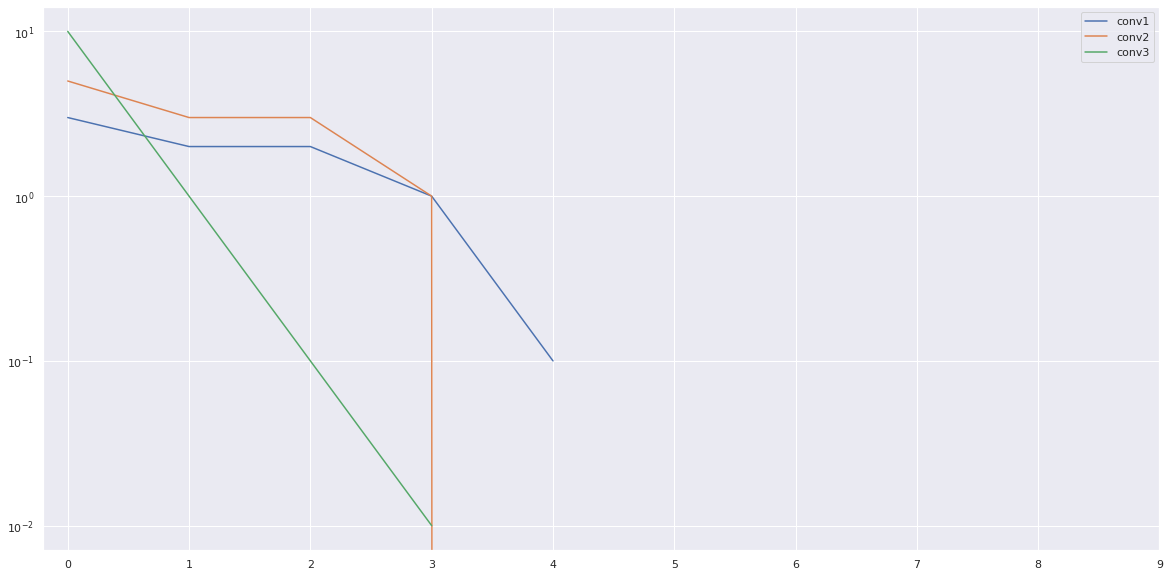

In [30]:
conv1 = [3, 2, 2, 1, 0.1]
conv2 = [5, 3, 3, 1, 0]
conv3 = [10, 1, 0.1, 0.01, None]


# seaborn prot of conv1, conv2, conv3 on a single plot with different colors and labels
sns.lineplot(x=range(5), y=conv1, label="conv1")
sns.lineplot(x=range(5), y=conv2, label="conv2")
sns.lineplot(x=range(5), y=conv3, label="conv3")
# only integer ticks on x-axis
plt.xticks(range(10))
# log scale on y-axis
plt.yscale("log")
# set image size in seaborn
sns.set(rc={'figure.figsize':(30,15)})

plt.legend()
plt.show()